In [21]:
from shapely.geometry import Polygon, Point, LineString
import matplotlib.pyplot as plt
import random

In [22]:
# Create polygons and points
polygon = Polygon([(10, 0), (10, 100), (0, 200), (60, 200), (50, 100), (50, 0)])
# TODO: Randomize start and end point on the bound
start = Point((20, 0))
end = Point((30, 200))

In [23]:
# Find m and b
def fx(p1, p2):
    # m = (y1 - y2) / (x1 - x2)
    if (p1.x - p2.x) != 0:
        m = (p1.y - p2.y) / (p1.x - p2.x)
    else:
        m = 0
    print("m =", m)
    # b = y - mx
    b = p1.y - (m * p1.x)
    print("b =", b)

    return m, b


In [24]:
# Find distance from point to line
# Equations to find point to line:
# +=d = (mx3 - y3 + C) / ((m^2 + 1)) ^ 0.5
def distance(point, m, b):
    x = point.x
    y = point.y
    d = (m * x - y + b) / ((m ** 2 + 1)) ** 0.5
    return d

In [35]:
# D = sqrt((start.x - point.x)^2 + (start.y - point.y)^2)
def pointsOnLine(start, end, n):
    pointsOL = []
    line = LineString([start, end])
    gap = 1 / (n + 1)
    d = gap
    for i in range(n):
        point = line.interpolate(d, normalized=True)
        d = d + gap
        pointsOL.append(point)
    return pointsOL
    

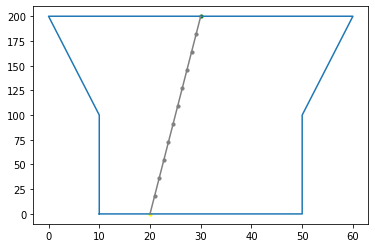

In [40]:
points = pointsOnLine(start, end, 10)
# Plot polygons and points
x,y = polygon.exterior.xy
plt.plot(x,y)
line_x = [start.x]
line_y = [start.y]
for i in range(len(points)):
    line_x.append(points[i].x)
    line_y.append(points[i].y)
    plt.scatter(points[i].x, points[i].y, s=10, color='grey')

plt.scatter(start.x, start.y, s=10, color='yellow')        
plt.scatter(end.x, end.y, s=10, color='green')
line_x.append(end.x)
line_y.append(end.y)
plt.plot(line_x, line_y, color='grey')

In [25]:
# Randomly find some points close to the line
m, b = fx(start, end)
count = 0
points = [start]
while (count < 10):
    point = Point((random.random() * 100, random.random() * 100))
    if (polygon.contains(point)):
        d = distance(point, m, b)
        if abs(d) < 5:
            points.append(point)
            count += 1

m = 20.0
b = -400.0


In [32]:
m, b = fx(start, end)
point = points[0]
distance(point, m, b)


m = 20.0
b = -400.0


0.0

3